In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D

from tensorflow.keras.optimizers import Adam

In [4]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
cancer = datasets.load_breast_cancer()

In [8]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:

X=cancer.data
Y=cancer.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)
Y_train = np.reshape(Y_train, (-1,1))
Y_test = np.reshape(Y_test, (-1,1))

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
print('Accuracy KNN(1): ', knn.score(X_test, Y_test))

Accuracy KNN(1):  0.9064327485380117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: Data

Text(18, 0.915, 'Under-fitting')

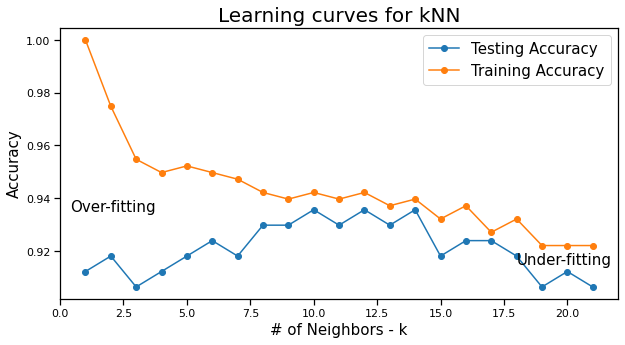

In [38]:
neighbors = np.arange(1, 22)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

plt.figure(figsize=(10,5))
sns.set_context('notebook', font_scale=1)
plt.title('Learning curves for kNN', size=20)
plt.plot(neighbors, test_accuracy, marker ='o', label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, marker ='o', label = 'Training Accuracy')
plt.xlabel('# of Neighbors - k', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size':15})
plt.annotate('Over-fitting', xy=(0.5, 0.94), xytext=(0.4, 0.935), size=15)
plt.annotate('Under-fitting', xy=(0.5, 0.94), xytext=(18, 0.915), size=15)


Overfitting is that space on the left and under fitting is on the right as shown above. When k value is less, we have over fitting and when k value is higher, we have under fitting. 


In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X)
x

array([[0.52, 0.02, 0.55, ..., 0.91, 0.6 , 0.42],
       [0.64, 0.27, 0.62, ..., 0.64, 0.23, 0.22],
       [0.6 , 0.39, 0.6 , ..., 0.84, 0.4 , 0.21],
       ...,
       [0.46, 0.62, 0.45, ..., 0.49, 0.13, 0.15],
       [0.64, 0.66, 0.67, ..., 0.91, 0.5 , 0.45],
       [0.04, 0.5 , 0.03, ..., 0.  , 0.26, 0.1 ]])

In [50]:
from sklearn.neural_network import MLPClassifier
my_model = MLPClassifier(max_iter=1000, activation = 'tanh', solver = 'lbfgs')

In [52]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
scores1 = []
kf = KFold(n_splits=5, random_state=10, shuffle = True)
for train_index, test_index in kf.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    my_model.fit(x_train, y_train)
    prediction = my_model.predict(x_test)
    scores1.append(accuracy_score(y_test,prediction))
score = sum(scores1)/len(scores1)
print("Accuracy score of MLP: ", score*100)   

Accuracy score of MLP:  94.55208818506445
